In [55]:
import pandas as pd
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf

#for 6.1
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#for 6.2
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

%matplotlib inline

Exercise 6.1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [56]:
df = pd.read_csv("house-votes-84.data", names = ['party','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'antisatellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa'])
df = df.replace(to_replace='y', value = 1).replace(to_replace='n', value = 0).replace(to_replace='?', value = np.nan)
df = df.fillna(df.mean())
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,antisatellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


In [57]:
df_y = df['party']
df_x = df.drop('party', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.30, random_state = 4444)

In [58]:
models = [LogisticRegression, KNeighborsClassifier, GaussianNB, SVC, DecisionTreeClassifier, RandomForestClassifier]

for model in models:
    m = model()
    fit = m.fit(X_train, y_train)
    y_predict = m.predict(X_test)
    print '%s' % model
    print 'Accuracy Score: ', accuracy_score(y_test, y_predict)
    print 'Precision Score: ', precision_score(y_test, y_predict, pos_label='republican')
    print 'Recall Score: ', recall_score(y_test, y_predict, pos_label='republican')
    print 'F1 Score: ', f1_score(y_test, y_predict, pos_label='republican') 
    print '\n'

<class 'sklearn.linear_model.logistic.LogisticRegression'>
Accuracy Score:  0.93893129771
Precision Score:  0.96
Recall Score:  0.888888888889
F1 Score:  0.923076923077


<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
Accuracy Score:  0.916030534351
Precision Score:  0.905660377358
Recall Score:  0.888888888889
F1 Score:  0.897196261682


<class 'sklearn.naive_bayes.GaussianNB'>
Accuracy Score:  0.93893129771
Precision Score:  0.979166666667
Recall Score:  0.87037037037
F1 Score:  0.921568627451


<class 'sklearn.svm.classes.SVC'>
Accuracy Score:  0.954198473282
Precision Score:  0.961538461538
Recall Score:  0.925925925926
F1 Score:  0.943396226415


<class 'sklearn.tree.tree.DecisionTreeClassifier'>
Accuracy Score:  0.93893129771
Precision Score:  0.942307692308
Recall Score:  0.907407407407
F1 Score:  0.924528301887


<class 'sklearn.ensemble.forest.RandomForestClassifier'>
Accuracy Score:  0.946564885496
Precision Score:  0.960784313725
Recall Score:  0.90740740740

Exercise 6.2

For each, draw the Precision-Recall curve, ROC curve and calculate the AUC.

AUC: 0.987734487734


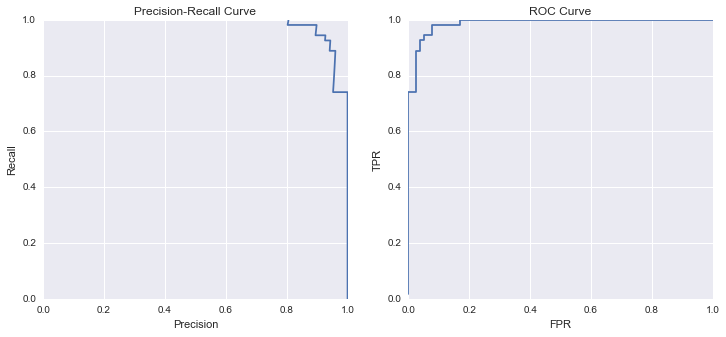

In [59]:
model = LogisticRegression()
prob = model.fit(X_train, y_train).predict_proba(X_test)

precision, recall, threshold = precision_recall_curve(y_test, prob[:,1], pos_label='republican') 
fpr, tpr, threshold = roc_curve(y_test, prob[:,1], pos_label='republican')
print "AUC:", auc(fpr, tpr)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xlim(0,1)
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision-Recall Curve')
plt.plot(precision, recall)
plt.legend(loc=0)
    
plt.subplot(1,2,2)
plt.plot(fpr, tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.legend(loc=0)

AUC: 0.948412698413


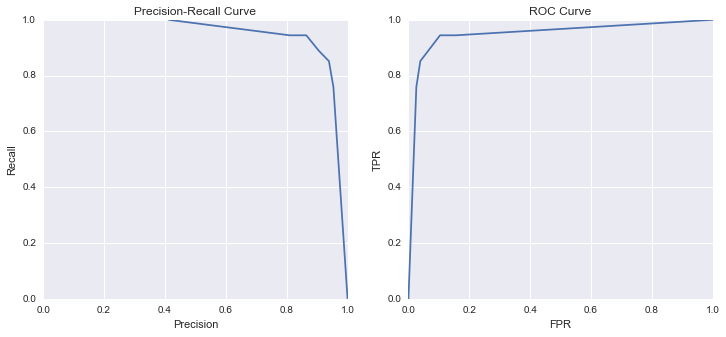

In [60]:
model = KNeighborsClassifier()
prob = model.fit(X_train, y_train).predict_proba(X_test)

precision, recall, threshold = precision_recall_curve(y_test, prob[:,1], pos_label='republican') 
fpr, tpr, threshold = roc_curve(y_test, prob[:,1], pos_label='republican')
print "AUC:", auc(fpr, tpr)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xlim(0,1)
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision-Recall Curve')
plt.plot(precision, recall)
plt.legend(loc=0)
    
plt.subplot(1,2,2)
plt.plot(fpr, tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.legend(loc=0)

AUC: 0.984126984127


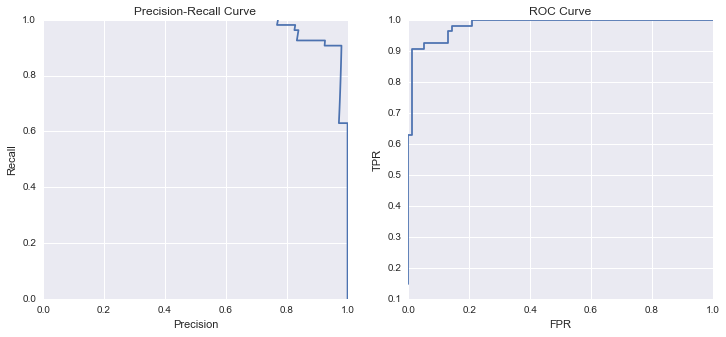

In [61]:
model = GaussianNB()
prob = model.fit(X_train, y_train).predict_proba(X_test)

precision, recall, threshold = precision_recall_curve(y_test, prob[:,1], pos_label='republican') 
fpr, tpr, threshold = roc_curve(y_test, prob[:,1], pos_label='republican')
print "AUC:", auc(fpr, tpr)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xlim(0,1)
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision-Recall Curve')
plt.plot(precision, recall)
plt.legend(loc=0)
    
plt.subplot(1,2,2)
plt.plot(fpr, tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.legend(loc=0)

AUC: 0.994949494949


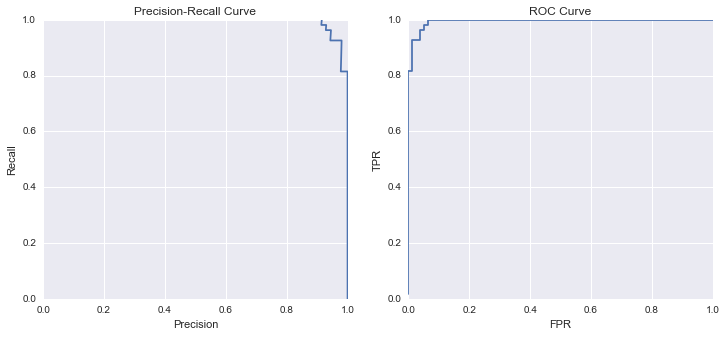

In [62]:
model = SVC(probability=True)
prob = model.fit(X_train, y_train).predict_proba(X_test)

precision, recall, threshold = precision_recall_curve(y_test, prob[:,1], pos_label='republican') 
fpr, tpr, threshold = roc_curve(y_test, prob[:,1], pos_label='republican')
print "AUC:", auc(fpr, tpr)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xlim(0,1)
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision-Recall Curve')
plt.plot(precision, recall)
plt.legend(loc=0)
    
plt.subplot(1,2,2)
plt.plot(fpr, tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.legend(loc=0)

AUC: 0.940716690717


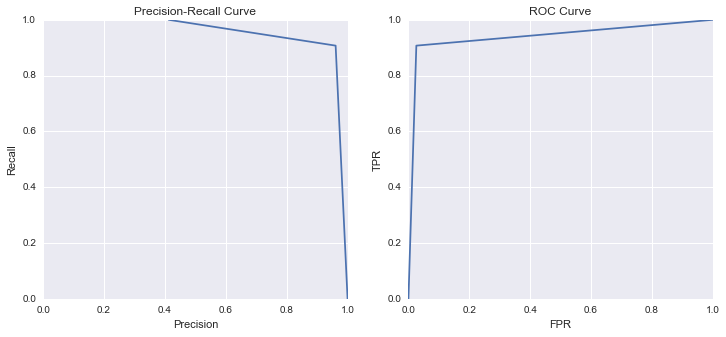

In [63]:
model = DecisionTreeClassifier()
prob = model.fit(X_train, y_train).predict_proba(X_test)

precision, recall, threshold = precision_recall_curve(y_test, prob[:,1], pos_label='republican') 
fpr, tpr, threshold = roc_curve(y_test, prob[:,1], pos_label='republican')
print "AUC:", auc(fpr, tpr)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xlim(0,1)
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision-Recall Curve')
plt.plot(precision, recall)
plt.legend(loc=0)
    
plt.subplot(1,2,2)
plt.plot(fpr, tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.legend(loc=0)

AUC: 0.99543049543


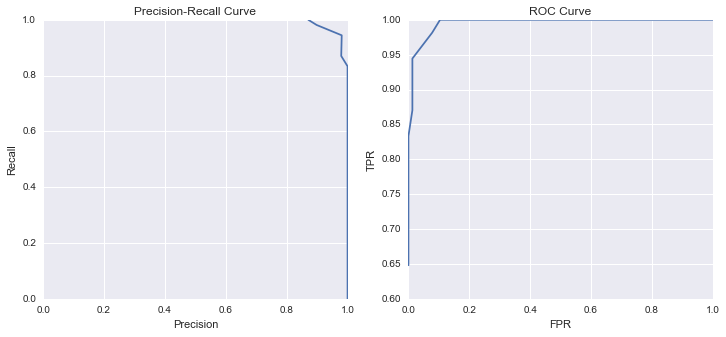

In [64]:
model = RandomForestClassifier()
prob = model.fit(X_train, y_train).predict_proba(X_test)

precision, recall, threshold = precision_recall_curve(y_test, prob[:,1], pos_label='republican') 
fpr, tpr, threshold = roc_curve(y_test, prob[:,1], pos_label='republican')
print "AUC:", auc(fpr, tpr)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xlim(0,1)
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision-Recall Curve')
plt.plot(precision, recall)
plt.legend(loc=0)
    
plt.subplot(1,2,2)
plt.plot(fpr, tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.legend(loc=0)

Exercise 6.3

Draw the Precision-Recall curve, ROC curve (and calculate AUC) for the logistic regression classifier from Exercise 5.12 in 05-Classification Challenge that uses Haberman Survival Dataset

In [71]:
haberman = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', names = ['age', 'year', 'nodes', 'status'])
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [80]:
X = haberman.iloc[:, 0:3]
y = haberman.iloc[:, 3]
y[y==2] = 0 # otherwise won't recognize data as binary when creating prc below.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4444)

AUC: 0.647522522523


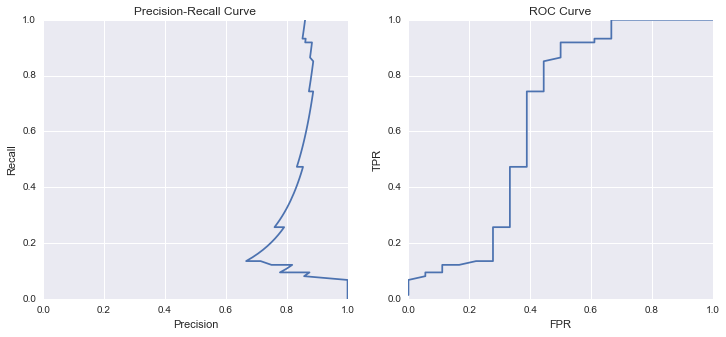

In [81]:
model = LogisticRegression()
prob = model.fit(X_train, y_train).predict_proba(X_test)

precision, recall, threshold = precision_recall_curve(y_test, prob[:,1]) 
fpr, tpr, threshold = roc_curve(y_test, prob[:,1])
print "AUC:", auc(fpr, tpr)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.xlim(0,1)
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision-Recall Curve')
plt.plot(precision, recall)
plt.legend(loc=0)
    
plt.subplot(1,2,2)
plt.plot(fpr, tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.legend(loc=0)